# 🎯 Project Objective (Emotion Analysis with NLP)

The objective of this project is to perform emotion analysis on textual data using Natural Language Processing (NLP) techniques. The project focuses on preprocessing raw text data, extracting meaningful features, and building machine learning models such as Logistic Regression, Multinomial Naive Bayes, and Support Vector Machine (SVM) to classify emotions expressed in product reviews. The emotions may include happy, sad, angry, neutral, or positive/negative. The performance of these models is evaluated to determine the most effective approach for emotion prediction.

# 📘 Explanation of the Objective (NLP-Based Emotion Analysis)
## 1. Use of Natural Language Processing (NLP)

NLP enables machines to understand, interpret, and analyze human language. In this project, NLP techniques are used to convert unstructured textual reviews into structured data that can be processed by machine learning algorithms for emotion detection.

## 2. Text Preprocessing Using NLP Techniques

The text data is cleaned and normalized using standard NLP preprocessing steps, including:

Tokenization

Lowercasing

Stopword removal

Stemming or Lemmatization

Removal of punctuation, special characters, and noise

Feature extraction using Bag of Words (BoW) or TF-IDF

These steps enhance text quality and improve model accuracy.

## 3. Feature Extraction

NLP-based feature extraction techniques transform text into numerical vectors that represent emotional patterns within the reviews, enabling machine learning models to learn and differentiate between emotions.

## 4. Machine Learning Model Training

The extracted features are used to train multiple machine learning classifiers, including:

Multinomial Naive Bayes

Each model learns to classify text into different emotion or sentiment categories.

## 5. Model Evaluation

The trained models are evaluated using performance metrics such as:

Accuracy

Precision

Recall

F1-score

This evaluation helps identify the most effective NLP-based model for emotion analysis.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kushagra3204/sentiment-and-emotion-analysis-dataset")

print("Path to dataset files:", path)

100%|██████████| 14.9M/14.9M [00:00<00:00, 170MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/kushagra3204/sentiment-and-emotion-analysis-dataset/versions/1


In [ ]:
import os
print(os.listdir(path))

['archive']


In [5]:
import os
df = pd.read_csv(os.path.join(path, "archive", "combined_sentiment_data.csv"), encoding='latin1')

# Loading the Dataset

In [6]:
df.shape

(3309, 2)

# Display top 5 records

In [7]:
df.head()

,sentence,sentiment
0,So there is no way for me to plug it in here i...,negative
1,"Good case, Excellent value.",positive
2,Great for the jawbone.,positive
3,Tied to charger for conversations lasting more...,negative
4,The mic is great.,positive


# Display last 5 records

In [8]:
df.tail()

,sentence,sentiment
3304,Online anonymity enables freedom of expression...,negative
3305,Smart cities leverage data and technology to i...,positive
3306,Biometric identification technologies offer co...,negative
3307,Data ethics guidelines are essential for ensur...,positive
3308,Decentralized technologies such as blockchain ...,positive


# Display all the Datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   3309 non-null   object
 1   sentiment  3309 non-null   object
dtypes: object(2)
memory usage: 51.8+ KB


# 5 Points Summary Data

In [10]:
df.describe()

,sentence,sentiment
count,3309,3309
unique,3289,2
top,#NAME?,positive
freq,4,1679


# To check how many Row and Columns

In [11]:
df.shape

(3309, 2)

# To Check null Values

In [12]:
df.isnull().sum()

,0
sentence,0
sentiment,0


# To check duplicate values

In [13]:
df.duplicated().sum()

np.int64(19)

# To drop and fill duplicated values

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

# Values Count

In [15]:
df['sentiment'].value_counts()

,count
sentiment,
positive,1668
negative,1622


In [19]:
df['sentiment'].unique()

array(['negative', 'positive'], dtype=object)

# Generate summary statistics

In [17]:
df['sentiment'].describe()

,sentiment
count,3290
unique,2
top,positive
freq,1668


# Remove Tags

In [20]:
import re
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'),' ', raw_text)
    return cleaned_text

In [21]:
df['sentence'] = df['sentence'].apply(remove_tags)

# Convert all text in the 'Review' column to lowercase

In [22]:
df['sentence'] = df['sentence'].apply(lambda x:x.lower())

In [23]:
import re

def clean_product_name(text):
    if isinstance(text, str):
        text = re.sub(r'\?+', '', text)   # remove ??????
        return text.strip()
    return text

df['sentence'] = df['sentence'].apply(clean_product_name)


In [24]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
negations = {'not', 'no', 'never'}
stop_words -= negations

def remove_stopwords(text):
    return " ".join(word for word in text.split() if word not in stop_words)

df['sentence'] = df['sentence'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
df

,sentence,sentiment
0,no way plug us unless go converter.,negative
1,"good case, excellent value.",positive
2,great jawbone.,positive
3,tied charger conversations lasting 45 minutes....,negative
4,mic great.,positive
...,...,...
3304,online anonymity enables freedom expression al...,negative
3305,smart cities leverage data technology improve ...,positive
3306,biometric identification technologies offer co...,negative
3307,data ethics guidelines essential ensuring resp...,positive


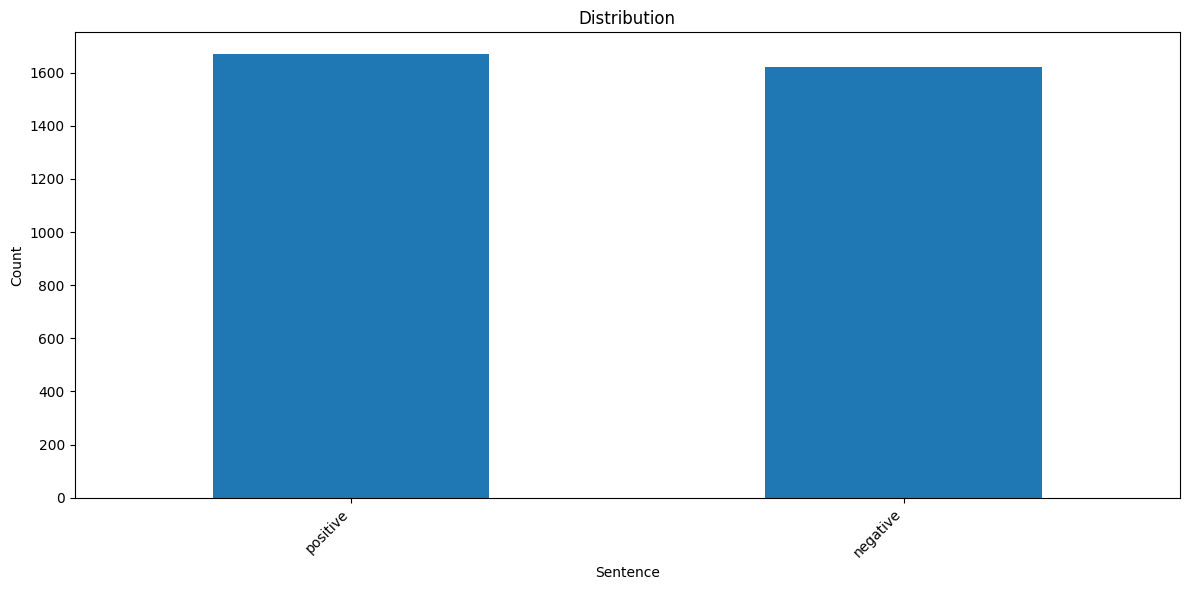

In [26]:
plt.figure(figsize=(12, 6))
df['sentiment'].value_counts().head(20).plot(kind='bar')
plt.title('Distribution')
plt.xlabel('Sentence')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Define X, y and perform train-test split

In [27]:
X = df.iloc[:,0:1]
y = df['sentiment']

In [28]:
X

,sentence
0,no way plug us unless go converter.
1,"good case, excellent value."
2,great jawbone.
3,tied charger conversations lasting 45 minutes....
4,mic great.
...,...
3304,online anonymity enables freedom expression al...
3305,smart cities leverage data technology improve ...
3306,biometric identification technologies offer co...
3307,data ethics guidelines essential ensuring resp...


In [29]:
y

,sentiment
0,negative
1,positive
2,positive
3,negative
4,positive
...,...
3304,negative
3305,positive
3306,negative
3307,positive


# Model Training and Testing

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Data Shape', X_train.shape)
print('Testing Data Shape', X_test.shape)

Training Data Shape (2632, 1)
Testing Data Shape (658, 1)


# Applying Bag of Word

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [32]:
X_train_bow = cv.fit_transform(X_train['sentence']).toarray()
X_test_bow = cv.transform(X_test['sentence']).toarray()

In [33]:
X_train_bow.shape

(2632, 5219)

In [34]:
X_test_bow.shape

(658, 5219)

# Initialize the Naive bayes and fit the model

In [35]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_bow,y_train)

GaussianNB()

# Predict labels for the test data

In [36]:
y_pred = gnb.predict(X_test_bow)

# To check Accuracy

In [37]:
accuracy_score(y_test,y_pred)

0.6231003039513677

In [38]:
confusion_matrix(y_test,y_pred)

array([[269,  52],
       [196, 141]])

# Initialize the Random Forest, Fit the model, Predict labels for the test data and check Accuracy Score

In [39]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_bow,y_train)
y_pred = rf.predict(X_test_bow)
accuracy_score(y_test,y_pred)

0.7933130699088146

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train_bow, y_train)

y_pred = rf.predict(X_test_bow)
accuracy_score(y_test, y_pred)

0.7917933130699089

# To check Accuracy Score

In [41]:
accuracy_score(y_test,y_pred)

0.7917933130699089

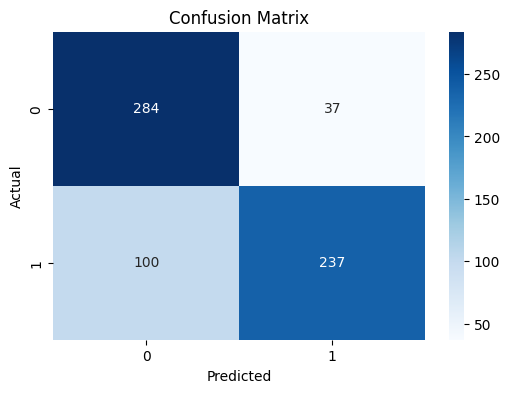

In [48]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [42]:
df['sentence']

,sentence
0,no way plug us unless go converter.
1,"good case, excellent value."
2,great jawbone.
3,tied charger conversations lasting 45 minutes....
4,mic great.
...,...
3304,online anonymity enables freedom expression al...
3305,smart cities leverage data technology improve ...
3306,biometric identification technologies offer co...
3307,data ethics guidelines essential ensuring resp...


In [47]:
def predict_review_sentiment(Review_input):
    # Apply preprocessing steps
    cleaned_text = remove_tags(str(Review_input))
    cleaned_text = cleaned_text.lower()
    cleaned_text = remove_stopwords(cleaned_text)

    # Transform the text using the fitted CountVectorizer
    text_bow = cv.transform([cleaned_text])

    # Predict the sentiment using the trained RandomForestClassifier
    prediction = rf.predict(text_bow)

    return prediction[0]

test_text = input("Enter the Review for the Sentiment: ")

# Call the predict_review_sentiment function with the correct argument name
prediction_result = predict_review_sentiment(
    Review_input=test_text
)

print(f'Result :   {prediction_result}')

Enter the Review for the Sentiment: no way plug us unless go converter
Result :   negative


# Final Outcome

The successful implementation of this project resulted in the development of an effective NLP-based emotion and sentiment analysis system capable of accurately classifying textual product reviews into appropriate emotion or sentiment categories such as positive, negative, or neutral. Through comprehensive text preprocessing, feature extraction using TF-IDF / Bag of Words, and training multiple machine learning models including Multinomial Naive Bayes the system was able to learn meaningful patterns from customer feedback.